In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="ticks")

In [35]:
# https://github.com/zygmuntz/goodbooks-10k/blob/master/tags.csv
books = pd.read_csv("./data/books.csv")
ratings = pd.read_csv("./data/ratings.csv")
book_tags = pd.read_csv("./data/book_tags.csv")
tags = pd.read_csv("./data/tags.csv")

In [3]:
def show_columns_and_types(df):
    """
    Print column names and column types of a dataframe.
    
    :param df: Dataframe to analyze
    :type: Pandas dataframe
    :return: -
    """
    print("column name; column type;")
    type_dict = {}
    for col_type, col_name in zip(df.dtypes, df.columns):
        type_dict[col_name] = col_type.name
    print(type_dict)
    
show_columns_and_types(books)

column name; column type;
{'book_id': 'int64', 'goodreads_book_id': 'int64', 'best_book_id': 'int64', 'work_id': 'int64', 'books_count': 'int64', 'isbn': 'object', 'isbn13': 'float64', 'authors': 'object', 'original_publication_year': 'float64', 'original_title': 'object', 'title': 'object', 'language_code': 'object', 'average_rating': 'float64', 'ratings_count': 'int64', 'work_ratings_count': 'int64', 'work_text_reviews_count': 'int64', 'ratings_1': 'int64', 'ratings_2': 'int64', 'ratings_3': 'int64', 'ratings_4': 'int64', 'ratings_5': 'int64', 'image_url': 'object', 'small_image_url': 'object'}


Names (e.g. title, author) are objects, values are ints or floats.

In [4]:
# inspect first values of df
books[:5]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
print(books.shape)

(10000, 23)


In [6]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


There are 10,000 entries for books. Interestingly, the original publication years reach from 2017 to -1750. Latter sounds like an error. The best rating for a book is 4.8 and the worst 2.47. Not too bad. The book with the most ratings has 4.7 million ratings, the book with the fewest ratings only 2,716 ratings.
Inspect the ratings. What is their distribution?

In [7]:
books[books["original_publication_year"] == -1750]["title"]

2075    The Epic of Gilgamesh
Name: title, dtype: object

Quick search for this title shows that this book really exists and was written a long time ago.

In [8]:
show_columns_and_types(ratings)
ratings[:4]

column name; column type;
{'user_id': 'int64', 'book_id': 'int64', 'rating': 'int64'}


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5


Ratings dataframe contains entries with a user id, the corresponding book id and a rating.

In [9]:
# check if any null/nan values are in the data for the ratings
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [10]:
ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


Ratings are within the range of 1-5.

In [55]:
len(ratings.groupby(["user_id", "book_id"]).size().reset_index()) == ratings.shape[0]

True

No duplicate ratings for a user - book combination.

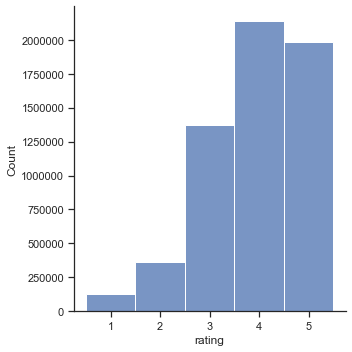

In [21]:
sns.displot(data=ratings["rating"], discrete=True)

In [ ]:
ratings_per_user = ratings.groupby(["user_id"]).count()["rating"].reset_index(name="rating_counts")


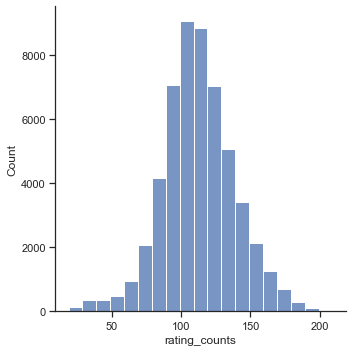

In [32]:
sns.displot(data=ratings_per_user, x="rating_counts", binwidth=10)

Most of the users have around 100 ratings. Maximum number of ratings is 200.

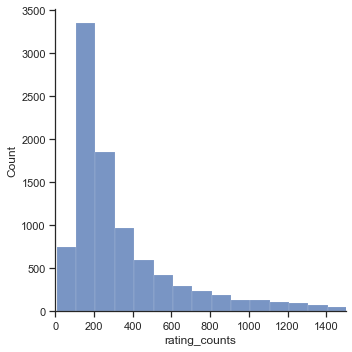

In [64]:
ratings_per_book = ratings.groupby(["book_id"]).count()["rating"].reset_index(name="rating_counts")
book_hist = sns.displot(data=ratings_per_book, x="rating_counts", binwidth=100)
book_hist.set(xlim=(0, 1500))
plt.show()

In [68]:
ratings_per_book["rating_counts"].describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: rating_counts, dtype: float64

In [36]:
show_columns_and_types(book_tags)

column name; column type;
{'goodreads_book_id': 'int64', 'tag_id': 'int64', 'count': 'int64'}


In [37]:
show_columns_and_types(tags)

column name; column type;
{'tag_id': 'int64', 'tag_name': 'object'}


In [38]:
book_tags[:4]

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986


In [41]:
tags[:50]

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-
6,6,--17-
7,7,--19-
8,8,--2-
9,9,--258-
